In [ ]:
#bạn có thể vào link và download data về
# https://www.kaggle.com/vikrishnan/    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [5]:
m_house = pd.read_csv("/home/thinh-do/Hoc_Tap/Machine_Learning_Basic/4_Linear_regression/Tự luyện/housing.csv",delim_whitespace =True, header = None) # doc csv

column = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'PRICE']
m_house.columns = column # them ten cot
print(m_house) #hien thi bang

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [6]:
m_house.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
x_data=m_house.drop('PRICE',axis=1)#  x_data gán dũ liệu từ bảng trừ cột PRICE
y_data=m_house.PRICE #gán biến y_data= cot PRiCE

print(x_data.shape)
print(y_data.shape)#kich thước 2 biến

(506, 13)
(506,)


In [8]:
print(y_data)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [9]:
y_data=np.array(y_data).reshape(len(y_data),-1)
print(y_data)# chuyen ve ma trạn 2 chièu

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [10]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)#tách làm test với train theo tỉ lệ 


In [11]:

model=LinearRegression()


In [12]:
models=model.fit(x_train,y_train)

In [13]:
predictions = model.predict(x_test)
print(predictions[:10])
print(y_train[0:10])

[[21.40490564]
 [17.91622088]
 [-1.43977123]
 [28.40067968]
 [13.01476461]
 [25.69114585]
 [25.58373736]
 [20.88856961]
 [26.35264618]
 [22.3060452 ]]
[[14.3]
 [23.9]
 [34.7]
 [11.7]
 [29.4]
 [36.2]
 [24.3]
 [10.2]
 [19.5]
 [13.4]]


In [14]:
model.score(x_test,y_test)

#tính phần trăm độ ngu của model à nhầm % dự đoán của model

0.6274288562732881

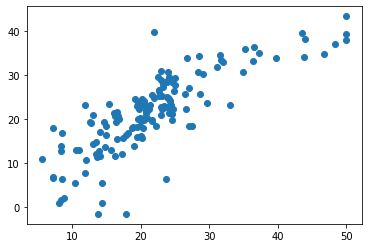

In [15]:
plt.scatter(y_test,predictions)
plt.show()

/home/thinh-do/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

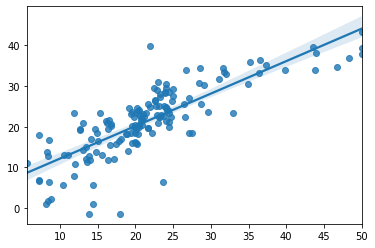

In [16]:
plt.figure()
sns.regplot(y_test,predictions)

<AxesSubplot:>

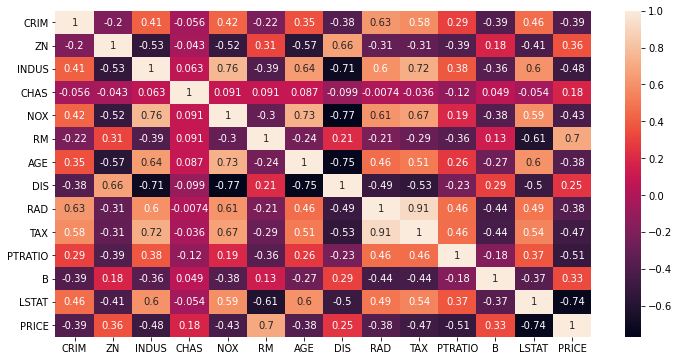

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(m_house.corr(),annot=True)
#các bạn có thể đảo data = sklearn,  cho model học lại với trình tự tương tự nữa và so sánh với kết quả lần 1